# 教養としてのアルゴリズムとデータ構造

* 以下の各問について、問の次（もしくはその次）にあるコードセルに解答すること。
    * 特に指定がある場合を除いて複数のセルに分けて解答してはならない。
* 全ての解答を終えた後に必ずリスタートを実行し、上のセルから順番に実行して各解答が正しく動くことを確認すること。
 * ただし、ローカル環境で解答する場合、 `!wget...` の記載のあるセルは実行しなくてよい。 
* 提出にあたっては、各当該のセルに解答のコードを記入し、それを実行した結果を表示させた後に、保存したこのファイルをITC-LMS経由で提出すること。
* 解答のコードには適宜コメントを入れること。
* 受講者間の協力は原則許可しない。
* 解答がコピペと判断された場合、その解答（コピペ元も含めて）は0点となる可能性があるので注意すること。
* 特に指定がない限りモジュールを用いて解答してはならない。


<b><font color="red">
各問に解答するにあたり、以下の点に注意して下さい。

1. グラフを大きさ2のタプルを要素とするリストは配布したスライド (03_Tree.ppt, 11ページ) の形式に従うものとします。
 * 例えば、`[(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 6), (2, 7)]` の様な値です。
2. 隣接リストは授業で配布したスライド (03_Tree.ppt, 14ページ) の形式に従うものとします。  
 * 例えば、`[[1,2,3], [4, 5], [6, 7], [], [8, 9, 10], [11], [12, 13], [], [], [], [], [], [], []]` の様な値です。
3. 隣接行列は授業で配布したスライド (04_Graph.ppt, 10ページ) の形式に従うものとします。  
 * 例えば、`{(0,1):1, (0,2):1, (0,3):1, (1,0):1, (1,4):1, (1,6):1, (2,5):1, (3,2):1, (3,5):1, (3,6):1, (4,5):1, (4,7):1, (5,4):1, (5,7):1, (7,1):1, (7,3):1 }` の様な値です。 
4. `bisect`, `collections (deque)` は使用可能です。

</font></b>

* ローカル環境で行う場合、課題によってはデータを別にダウンロードする必要があります。
* Colaboratoryを利用して課題を行う場合には、最初に以下のセルを実行して下さい。

In [ ]:
!wget https://drive.google.com/uc?id=1f5tjyfqDgcoHYyqedfhRKrmZ-eOGivX7 -O utaadevalcpx.zip
!unzip utaadevalcpx.zip
!wget https://drive.google.com/uc?id=1iZs6mSXv5yfmB2t41we3FBlMCeFENv3u -O ex4_data2_dblp.zip
!unzip ex4_data2_dblp.zip
!wget https://drive.google.com/uc?id=1AC1lF5qDNAAZgtcmvg-pMrjHeHT5VXnz -O ex4_data1_dblp_list_edge.zip
!unzip ex4_data1_dblp_list_edge.zip
!wget https://drive.google.com/uc?id=19pDQWfif8opR5teMeWD8SeeQZVdAdkbr -O ex4_data1_dblp_list_IDToScrName.zip
!unzip ex4_data1_dblp_list_IDToScrName.zip
!wget https://drive.google.com/uc?id=1hFbWEB0iBtcu8So4hooNY0yOLuHXJbLH -O ex4_data1_dblp_list_IDfam.zip
!unzip ex4_data1_dblp_list_IDfam.zip

以下のセルは各解答セルのプログラムの計算量を自動的に評価するのに利用します。
* ローカル環境で解答している人はファイルを保存してから以下のセルをそのまま実行して下さい（このファイルと同じフォルダ内に `utaadevalcpx.py` があることを確認して下さい）。
* Colaboratoryを利用している人は評価用セル内部の `str_code_X_Y  = '''...'''` の `...` に自分の解答をコピペして下さい（`X` と `Y` は問の通し番号です。ファイル冒頭のデータのダウンロードを事前に行う必要があります）。

計算量の自動評価は、常に正しい計算量を求められる訳ではありません（<font color="red">正しく求められなかった場合、実際の計算量よりも計算量が少なく求まります</font>）。例えば、以下の様な内容のコードは正しく評価できないことがあります。
* 組み込み関数などの名前を別名に変更している
* 条件式の使用（例えば、for文中のif文＋`break`など）
* while文を使用する

計算量の評価を行うセルでエラーが発生しても解答が間違っているという訳ではありません（模範解答とは違う解答である可能性が高いです）。

Pythonのバージョンが3.7以外だと、正しく評価されないことが多い様です（Colab.は3.7です）。

In [6]:
str_exfilename = "ex4.ipynb" # ファイル名を変更している場合、ここをその名前に変更する必要があります（ローカル環境のみ/Colab環境では使用しませんが実行はして下さい

# 第4回本課題

## 3. 幅優先探索を用いたグラフ上の最短距離の算出

幅優先探索を用いてグラフの指定された点から各点までの最短距離を求める関数を作成して下さい。

具体的には、無向グラフ $G$ を表す大きさ2のタプルを要素とするリスト `list_edge`、$G$ の頂点数 `nodenum` と探索を開始する点（起点）の名前 `stnode` が引数として与えられたとき、 $G$ に対して幅優先探索を行って、起点 `stnode` から各点への最短距離を格納したリスト `list_D` を返す関数 `BFSofGraphForShortestDistances` を作成して下さい。以下の点に注意して解答して下さい。

1. 各点は `0` から `nodenum-1` までの整数で表されます。すなわち、 `list_edge` を構成する大きさ2のタプルの要素は、 `0` から `nodenum-1` までの整数です。
2. $G$を構成する点$v$と$u$の間に枝がある場合、`(u, v)`、もしくは `(v, u)` が `list_edge` に含まれます。 
  * `(u, v)` と `(v, u)` の両方が `list_edge` には含まれることはありません。
3. 同じ値は2個以上 `list_edge` には含まれません。
4. `list_D` の `i` 番目の要素 `list_D[i]` は、`stnode` から点 `i` までの最短距離を格納します。
5. ただし、全ての点は起点からの経路が存在する（到達可能である）様なグラフが引数として与えられるものとします。
6. 全ての点は `stnode` から到達可能です。
7. 必要な場合は解答用セルの中で定義されている `FIFOClass` を使用して下さい（第3回の課題と使い方は同じです）。

なお、各値の大きさは以下の通りとします。
* $m =$ $G$ の枝の数
* $n =$ $G$ の点の数
* $k =$ $G$ の点の中で最大の隣接点数

以下のセルの `...` のところを書き換えて解答して下さい。

In [7]:
### この行のコメントを改変してはいけません %4-3% ### 
#解答用セル
import collections
#FIFOキュー
class FIFOClass:
    def __init__(self): # 初期化
        self.list_data = []
    def enqueue(self, item1): # 要素を最後尾に格納する
        self.list_data.append(item1)
    def dequeue(self):# 格納されている先頭の要素を取り出す
        return self.list_data.pop(0)
    def length(self): # リストの長さを返す
        return len(self.list_data)

def getAdjListOfDirectedGraphFromEdges(list_edge, nodenum):
    #list_AdjListの初期化
    list_AdjList = [[] for i in range(nodenum)]
    #(v, u)を読み取り，隣接リスト[v]にuを，隣接リスト[u]にvを追加する
    for edge in list_edge:
        list_AdjList[int(edge[0])].append(int(edge[1]))
        list_AdjList[int(edge[1])].append(int(edge[0]))
    return list_AdjList

def BFSofGraphForShortestDistances(list_edge, nodenum, stnode):
    #無向グラフの隣接リストを作成する
    list_AdjList = getAdjListOfDirectedGraphFromEdges(list_edge, nodenum)
    #最短距離を格納するリストlist_Dを初期化
    list_D = [0] * nodenum
    #FIFOキューを初期化
    FIFO = FIFOClass()
    #stnodeをFIFOキューに入れる
    FIFO.enqueue(stnode)
    #一度キューに入ったnodeを記録しておく
    FIFO_buf = [stnode]
    #FIFOキューが空になるまで探索（ループ）
    while(len(FIFO.list_data) > 0):
        # FIFOキューから点node1を取り出す
        node1 = FIFO.dequeue()
        #node1の子childnodeを全て処理する
        for childnode in list_AdjList[node1]:
            #一度キューに入ったことのあるnodeはとばす
            if childnode in FIFO_buf:
                continue
            #node1の子childnodeをFIFOキューに入れる
            FIFO.enqueue(childnode)
            #一度キューに入ったnodeを記録しておく
            FIFO_buf.append(childnode)
            #距離を1増やす
            list_D[childnode] = list_D[node1] + 1
    #list_Dを返す
    return list_D

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認して下さい。

In [8]:
list_edge_test1 = [(1, 0), (2, 0), (1, 2), (9, 1), (8, 2), (5, 3), (6, 3), (7, 3), (5, 4), (4, 7), (5, 7), (8, 6), (7, 8)]
print(BFSofGraphForShortestDistances(list_edge_test1, 10, 0) == [0, 1, 1, 4, 4, 4, 3, 3, 2, 2])
print(BFSofGraphForShortestDistances(list_edge_test1, 10, 9) == [2, 1, 2, 5, 5, 5, 4, 4, 3, 0])
print(BFSofGraphForShortestDistances(list_edge_test1, 10, 7) == [3, 3, 2, 1, 1, 1, 2, 0, 1, 4])

True
True
True


以下のセルを実行すると解答セルのプログラムの計算量を自動的に評価します。

この課題の模範解答の時間計算量は<font color="white"> $O(m+n)$ と評価されます。</font>（←白黒反転しています）  
想像（模範解答）よりも大きな計算量となっている場合、どこに問題があるのか考えてみて下さい。

In [9]:
import utaadevalcpx;dic_varinfo_4_3 = {"list_edge": ["list", set(), {"m"}],"nodenum": ["int", set(), {"n"}],}
str_code_4_3 = '''...'''
utaadevalcpx.evaluateCpx(str_exfilename, "4-3", dic_varinfo_4_3, str_code_4_3) # str_exfilenameはファイルの冒頭で定義されています

('時間計算量：O(n+m), ', '領域計算量：O(mn)', '')

なお、`list_edge_test1` は以下の様なグラフになっています。

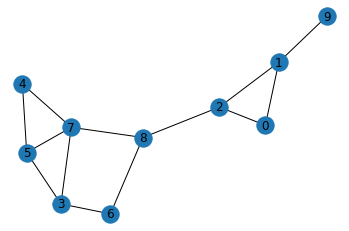

In [10]:
import networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
#隣接リストをnx形式に変換（枝を加える）→描画
def drawEdgesUsingNx(nx_tree, list_edge, dic_pos, axval):
    for edge1 in list_edge:
        nx_tree.add_edge(edge1[0], edge1[1])
    axval.set_axis_off()
    nx.draw_networkx(nx_tree, pos=dic_pos, ax=axval)
#1つの木を描画
fig, npar_axval = plt.subplots(1, 1, figsize=(6, 4))
#1
list_edge_test1 = [(1, 0), (2, 0), (1, 2), (9, 1), (8, 2), (5, 3), (6, 3), (7, 3), (5, 4), (4, 7), (5, 7), (8, 6), (7, 8)]
nx_graph1 = nx.Graph()
drawEdgesUsingNx(nx_graph1, list_edge_test1, None, npar_axval)

計算機科学分野の論文情報を公開しているDBLPというサイト ( https://dblp.uni-trier.de/ ) から著者の共著関係を無向グラフ（論文執筆者を頂点、共著で論文で執筆したことがある執筆者同士の間に枝があるとみなす）として用意しました。

このグラフには例えば、次の様な著名人が含まれます。

頂点の番号 | 著者名 | 概要 
 - | - | - 
<font color=#008b8b>291399</font> | <font color=#008b8b>Shapley, Lloyd S.</font> | 2012年のノーベル経済学賞の受賞者。東大の進振りにも彼の考案したアルゴリズムが使われているとかいないとか
<font color=#ff7f50>275409</font> | <font color=#ff7f50>Roth, Alvin E.</font> | 2012年のノーベル経済学賞の受賞者
<font color=#006400>13067</font> | <font color=#006400>Allen, Paul G.</font> | マイクロソフトの創業者。沈没した軍艦を引き上げたりしている人の方
<font color=#aa4500>102714</font> | <font color=#aa4500>Gates, William H.</font> | マイクロソフトの創業者
<font color=#2f4f8f>234636</font> | <font color=#2f4f8f>Neumann, John von</font> | ノイマン型計算機の考案者
<font color=#c71585>60161</font> | <font color=#c71585>Chomsky, Noam</font> | 色々なところに顔を出す言語学者
<font color=#2e8b57>275334</font> | <font color=#2e8b57>Rossum, Guido van</font> | Ptyhonの考案者
<font color=#00008b>75861</font> | <font color=#00008b>Dijkstra, Edsger W.</font> | 計算機科学者。ダイクストラ。オランダ人

試しに、Shapley （安定マッチングの研究者）から各人物までの最短距離を求めてみましょう。以下のセルを実行し、実行結果が `True` になることを確認して下さい（実装方法によっては時間がかかります）。

In [11]:
import json
if 'list_dblp_edge' not in globals(): 
    with open("ex4_data1_dblp_list_edge.json", "r", encoding="utf-8") as f:
        list_dblp_edge = json.load(f)
dblp_nodenum = 390192
dblp_stnode = 291399
list_dblp_edgetup = []
for node1, node2 in list_dblp_edge:
    list_dblp_edgetup.append((node1, node2))
list_dblp_D = BFSofGraphForShortestDistances(list_dblp_edgetup, dblp_nodenum, dblp_stnode)
print(list_dblp_D[0:10]==[6, 7, 5, 5, 6, 7, 5, 5, 5, 5])

True


上記の著名人から Shapley までの距離と Shapley から一番遠い著者までの距離を調べてみましょう。

In [12]:
if 'list_dblp_IDfam' not in globals(): 
    with open("ex4_data1_dblp_list_IDfam.json", "r", encoding="utf-8") as f:
        list_dblp_IDfam = json.load(f)
for node1, name1, str1 in list_dblp_IDfam:
    print(name1, list_dblp_D[node1])
print("一番遠い著者までの距離: ", max(list_dblp_D))

Shapley, Lloyd S. 0
Roth, Alvin E. 4
Allen, Paul G. 4
Gates, William H. 4
Neumann, John von 6
Chomsky, Noam 5
Rossum, Guido van 4
Dijkstra, Edsger W. 5
一番遠い著者までの距離:  16


同時にノーベル賞を受賞した Roth とは以外に距離がありますね。`ex4_data1_dblp_list_IDToScrName.json` には、通し番号 `i` の著者を `i` 番目に格納したリストが保存してあります。興味があれば色々と調べてみて下さい。

最後に著名人とShapleyの関係を最短距離に基づいて可視化してみます。

In [25]:
%matplotlib inline
import networkx as nx, matplotlib.pyplot as plt
#著名人の最短距離を描画
def drawShortestDistances(nx_g1, list_edge, list_D, set_node, set_colnode, dic_nodecol):
    list_nodecol = []
    list_nodesize = []
    plt.figure(figsize=(12, 8))
    set_fin = set()
    maxdis = max(list_D)
    for node1, node2 in list_edge:
        if node1 not in set_node or node2 not in set_node:
            continue
        setColAndSize(nx_g1, node1, list_D, maxdis, dic_nodecol, set_fin, list_nodecol, list_nodesize)
        setColAndSize(nx_g1, node2, list_D, maxdis, dic_nodecol, set_fin, list_nodecol, list_nodesize)
        nx_g1.add_edge(node1, node2)
    nx.draw_networkx(nx_g1, node_size=list_nodesize, node_color=list_nodecol)
    plt.axis('off')
    plt.show()
#色と大きさを設定
def setColAndSize(nx_g1, node1, list_D, maxdis, dic_nodecol, set_fin, list_nodecol, list_nodesize):
    if node1 not in set_fin:
        nx_g1.add_node(node1)
        if node1 in  dic_nodecol:
            col1 = dic_nodecol[node1]
        else:
            col1 = "#b0b0b0"
        list_nodecol.append(col1)
        size1 = int(maxdis/(list_D[node1]+1)) * 60 + 50
        list_nodesize.append(size1)
        set_fin.add(node1)
    return
#
nx_g1 = nx.Graph()
set_dblp_node = {381313, 60161, 234883, 172290, 275334, 13576, 27147, 13067, 234636, 175641, 275360, 349222, 41127, 27435, 108212, 102714, 291399, 8520, 275409, 75861, 270182, 74983, 86394, 247411, 112243, 81400, 146554, 151293}
set_dblp_fam = {60161, 275334, 291399, 13067, 234636, 275409, 75861, 102714}
dic_dblp_nodecol = {291399: '#008b8b', 275409: '#ff7f50', 13067: '#006400', 102714: '#aa4500', 234636: '#2f4f8f', 60161: '#c71585', 275334: '#2e8b57', 75861: '#00008b'}
drawShortestDistances(nx_g1, list_dblp_edge, list_dblp_D, set_dblp_node, set_dblp_fam, dic_dblp_nodecol)

NameError: name 'list_dblp_D' is not defined

<b>問題の難易度評価：</b>
下のセルにこの問の難易度を5段階（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）で評価して下さい。（次回以降の課題の難易度の調整に使います）
また、解答するのにかかった時間や感想などがあれば適宜記載して下さい。

In [ ]:
#難易度（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）
# 4
#感想
# 時間計算の下の著者関係のプログラムが実行できませんでした．もしかしたら，僕の解答が間違っているかも知れないです．

## 4. グラフ上の点の統合

論文の共著関係をグラフと見なした場合、例えば、$n$人の論文執筆者がある程度互いに共著者になったことがあると、それを表す$n$個の頂点の2頂点間には殆ど枝が存在することになります。

この様な関係が成立する執筆者たちは、論文執筆に関わる同じ集団（グループ、コミュニティ）に属していると見なすことが出来ますので、その様な集団を1つの頂点とみなしたグラフを考えることが出来ます。

次のセルを実行してみて下さい（`networkx` が上手く動かない人はColaboratoryで確認して下さい）。

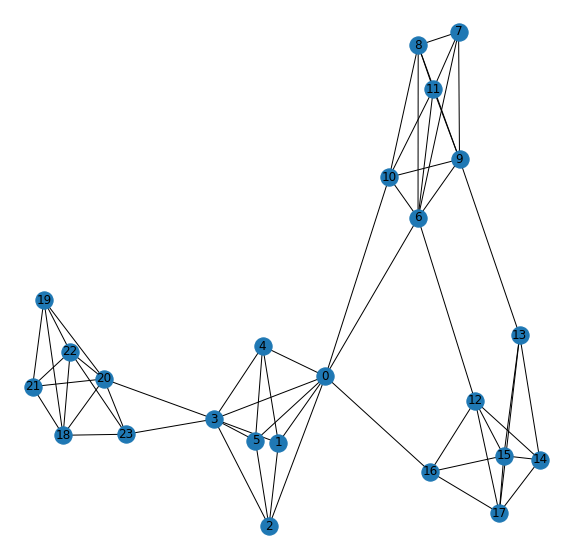

In [26]:
import networkx as nx, matplotlib.pyplot as plt, random
%matplotlib inline
random.seed(a=0)
Graph1 = nx.Graph()
for c in range(4):
    for i in range(6):
        for j in range(6):
            if random.randint(0, 2) == 0:
                continue
            node1 = i + 6 * c
            node2 = j + 6 * c
            Graph1.add_edge(node1, node2)
Graph1.add_edge(0, 6)
Graph1.add_edge(0, 10)
Graph1.add_edge(0, 16)
Graph1.add_edge(6, 12)
Graph1.add_edge(9, 13)
Graph1.add_edge(3, 20)
Graph1.add_edge(3, 23)
plt.figure(figsize=(10, 10))
nx.draw_networkx(Graph1, pos = nx.spring_layout(Graph1))
plt.axis('off')
plt.show();

上記の表示されたグラフの `0` から `5` 、 `6` から `11` 、 `12` から `17` 、 `18` から `23` の4つの頂点の集合をそれぞれ1つの頂点とみなし、それらの頂点の名前を `0, 6, 12, 18` として新しいグラフを作成した場合、その様子を描画してみたものが以下のセルを実行して表示されるグラフです。

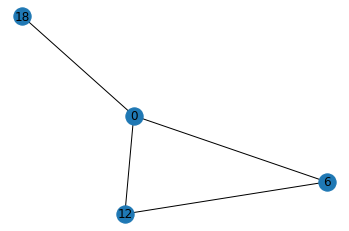

In [27]:
Graph2 = nx.Graph()
Graph2.add_edge(0, 6)
Graph2.add_edge(0, 12)
Graph2.add_edge(6, 12)
Graph2.add_edge(0, 18)
nx.draw_networkx(Graph2, pos = nx.spring_layout(Graph2))
plt.axis('off')
plt.show();

このとき、1つの頂点とみなされた頂点集合の中の頂点間の枝は全て消えてしまいました（例えば、元のグラフの点 `0` と点 `1` や点 `6` と点 `10` の間の枝）。

一方、異なる集合間にも多少の枝がありました。例えば、点 `0` から点 `10` への枝 $e_1$ 、点 `9` から点 `13` への枝 $e_2$ 、点 `9` から点 `13` への枝 $e_3$ のことです。

これらの枝は2つの集合間の枝として残っており、 $e_1$ は新しいグラフの点 `0` から点 `6` への枝、$e_2$ と $e_3$ は新しいグラフの点 `6` から点 `12` への1つの枝として存在しています。

計算機科学分野の論文情報を公開しているDBLPというサイト ( https://dblp.uni-trier.de/ ) から著者の共著関係を隣接行列形式の無向グラフとして用意しました。

そこで、そのグラフからある程度密な共著関係を形成している集団を1つの頂点とみなした新しい無向グラフを作成することを考えます。

具体的には、無向グラフ $G$ を表す大きさ2のタプルを要素とするリスト `list_edge` と $G$ の頂点数 `nodenum` と $G$ の幾つかの点の名前を格納したリスト `list_node` が引数として与えられた際、 `list_node` の点を1つにまとめたグラフ（隣接リスト、もしくは隣接行列）を返す関数 `contractor` を作成して下さい。以下の点に注意して解答して下さい（複数の点を1つにまとめることを「統合する」と呼ぶことにします）。

1. 各点は `0` から `nodenum-1` までの整数で表されます。
2. `list_node` に含まれる点を統合する際、 `list_node[0]` の点に統合する様にして下さい。具体的には、統合は以下の手順で行います。
    1. `list_node[0]` 以外の `list_node` の点と `list_node` に含まれない点 `v` の間の枝は削除して、  `list_node[0]` と `v` の間の枝を付け足します。
    2. `list_node` に含まれる点同士の枝は全て削除します。
        * 例えば、`list_node = [4, 2, 7]` かつ点 `2` と点 `5` の間に枝がある場合、返り値のグラフはその枝を含みません。代わりに、点 `4` と点 `5` との間には枝が存在します。  
        * 点 `2` と点 `7` の間に枝がある場合、返り値のグラフはそれらを含みません。



なお、各値の大きさは以下の通りとします。
* $m =$ $G$ の枝の数
* $n =$ $G$ の点の数
* $k =$ `list_node` の点数

以下のセルの `...` のところを書き換えて解答して下さい。

In [68]:
### この行のコメントを改変してはいけません %4-4% ### 
#解答用セル
def getAdjMatrixOfUndirectedGraphFromEdges(list_edge):
    #dic_adjmatrixの初期化
    dic_adjmatrix = {}
    #(v, u)を読み取り，dic_adjmatrixに{(v, u):1}と{(u, v):1}を追加する
    for edge in list_edge:
        dic_adjmatrix.update({edge: 1})
        dic_adjmatrix.update({(edge[1], edge[0]): 1})
    return dic_adjmatrix 

def contractor(list_edge, nodenum, list_node):
    #無効グラフの隣接行列を作成する
    dic_AdjMatrix = getAdjMatrixOfUndirectedGraphFromEdges(list_edge)
    #追加する枝のlistの初期化
    add_branch_list = []
    #削除する枝のlistの初期化
    delete_branch_list = []
    #消すnodeから生えている枝をdelete_branch_listに追加し，list_node[0]につなぎ直す枝をadd_branch_listに追加
    for node in list_node[1:]:
        for branch in dic_AdjMatrix.keys():
            if branch[0] == node:
                delete_branch_list.append(branch)
                if list_node[0] != branch[1]:
                    add_branch_list.append((list_node[0], branch[1]))
            elif branch[1] == node:
                delete_branch_list.append(branch)
                if list_node[0] != branch[0]:
                    add_branch_list.append((branch[0], list_node[0])) 
    #add_branch_listに含まれている枝を追加
    for branch in add_branch_list:
        dic_AdjMatrix.update({branch: 1})
    #delete_branch_listに含まれている枝を削除
    for branch in delete_branch_list:
        dic_AdjMatrix.pop(branch, None)

    return dic_AdjMatrix

上のセルで解答を作成した後、以下のセルを実行し、実行結果が全て `True` になることを確認して下さい。

In [49]:
# test1
list_edge_test1 = [(0, 4), (7, 6), (7, 4), (5, 3), (2, 4), (1, 2)]
res_test1 = contractor(list_edge_test1, 8, [2, 7, 1])
res_adjlist_test1 = sum([len(list1) for list1 in res_test1])==8, res_test1 == [[4], [], [4, 6], [5], [0, 2], [3], [2], []]
res_adjmatrix_test1 = len(res_test1)==8, res_test1 == {(0, 4): 1, (2, 4): 1, (2, 6): 1, (3, 5): 1, (4, 0): 1, (4, 2): 1, (5, 3): 1, (6, 2): 1}
print("test1:", res_adjlist_test1[0] or res_adjmatrix_test1[0], res_adjlist_test1[1] or res_adjmatrix_test1[1])
# test2
list_edge_test2 = [(1, 0), (0, 2), (1, 4), (6, 3), (1, 2), (5, 2), (7, 2), (8, 2)]
res_test2 = contractor(list_edge_test2, 9, [6, 3])
res_adjlist_test2 = sum([len(list1) for list1 in res_test2 ])==14, res_test2==[[1, 2], [0, 2, 4], [0, 1, 5, 7, 8], [], [1], [2], [], [2], [2]]
res_adjmatrix_test2 = (len(res_test2)==14, res_test2=={(1, 0): 1, (0, 1): 1, (0, 2): 1, (2, 0): 1, (1, 4): 1, (4, 1): 1, (1, 2): 1, (2, 1): 1, (5, 2): 1, (2, 5): 1, (7, 2): 1, (2, 7): 1, (8, 2): 1, (2, 8): 1})
print("test2:", res_adjlist_test2[0] or res_adjmatrix_test2[0], res_adjlist_test2[1] or res_adjmatrix_test2[1])

test1: True True
test2: True True


なお、テストで用いているグラフは以下の様な形になっています。

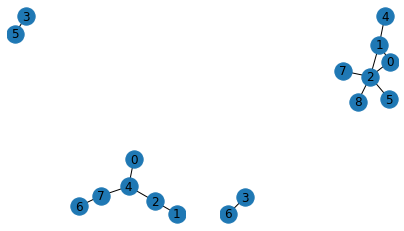

In [62]:
import networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
#隣接リストをnx形式に変換（枝を加える）→描画
def drawEdgesUsingNx(nx_tree, list_edge, dic_pos, axval):
    for edge1 in list_edge:
        nx_tree.add_edge(edge1[0], edge1[1])
    axval.set_axis_off()
    nx.draw_networkx(nx_tree, pos=dic_pos, ax=axval)
#2つの木を描画
fig, npar_axval = plt.subplots(1, 2, figsize=(7, 4))
#1
list_edge_test1 = [(0, 4), (7, 6), (7, 4), (5, 3), (2, 4), (1, 2)]
nx_graph1 = nx.Graph()
drawEdgesUsingNx(nx_graph1, list_edge_test1, None, npar_axval[0])
#2
list_edge_test2 = [(1, 0), (0, 2), (1, 4), (6, 3), (1, 2), (5, 2), (7, 2), (8, 2)]
nx_graph2 = nx.Graph()
drawEdgesUsingNx(nx_graph2, list_edge_test2, None, npar_axval[1])

以下のセルを実行すると解答セルのプログラムの計算量を自動的に評価します。

この課題の模範解答の時間計算量は<font color="white"> $O(m+nk)$ と評価されます。</font>（←白黒反転しています）  
想像（模範解答）よりも大きな計算量となっている場合、どこに問題があるのか考えてみて下さい。

In [70]:
import utaadevalcpx;dic_varinfo_4_4 = {"list_edge": ["list", set(), {"m"}],"nodenum": ["int", set(), {"n"}],"list_node": ["list", set(), {"k"}],}
str_code_4_4 = '''...'''
utaadevalcpx.evaluateCpx(str_exfilename, "4-4", dic_varinfo_4_4, str_code_4_4) # str_exfilenameはファイルの冒頭で定義されています

('時間計算量：O(m), ',
 '領域計算量：O(n+k+mm)',
 '解答のコードには適宜コメントを入れて下さい。正しくても評価者が読解できない場合は減点となる可能性があります。')

では、この関数を使って実際にDBLPのグラフの点を統合してみましょう。（最初のグラフとは別のグラフですが、）このグラフは、点数が `6252` 、枝の数が `39230` あり、 `543` 個の点を1つに統合したりしますので、実装の仕方によっては時間がかかります。

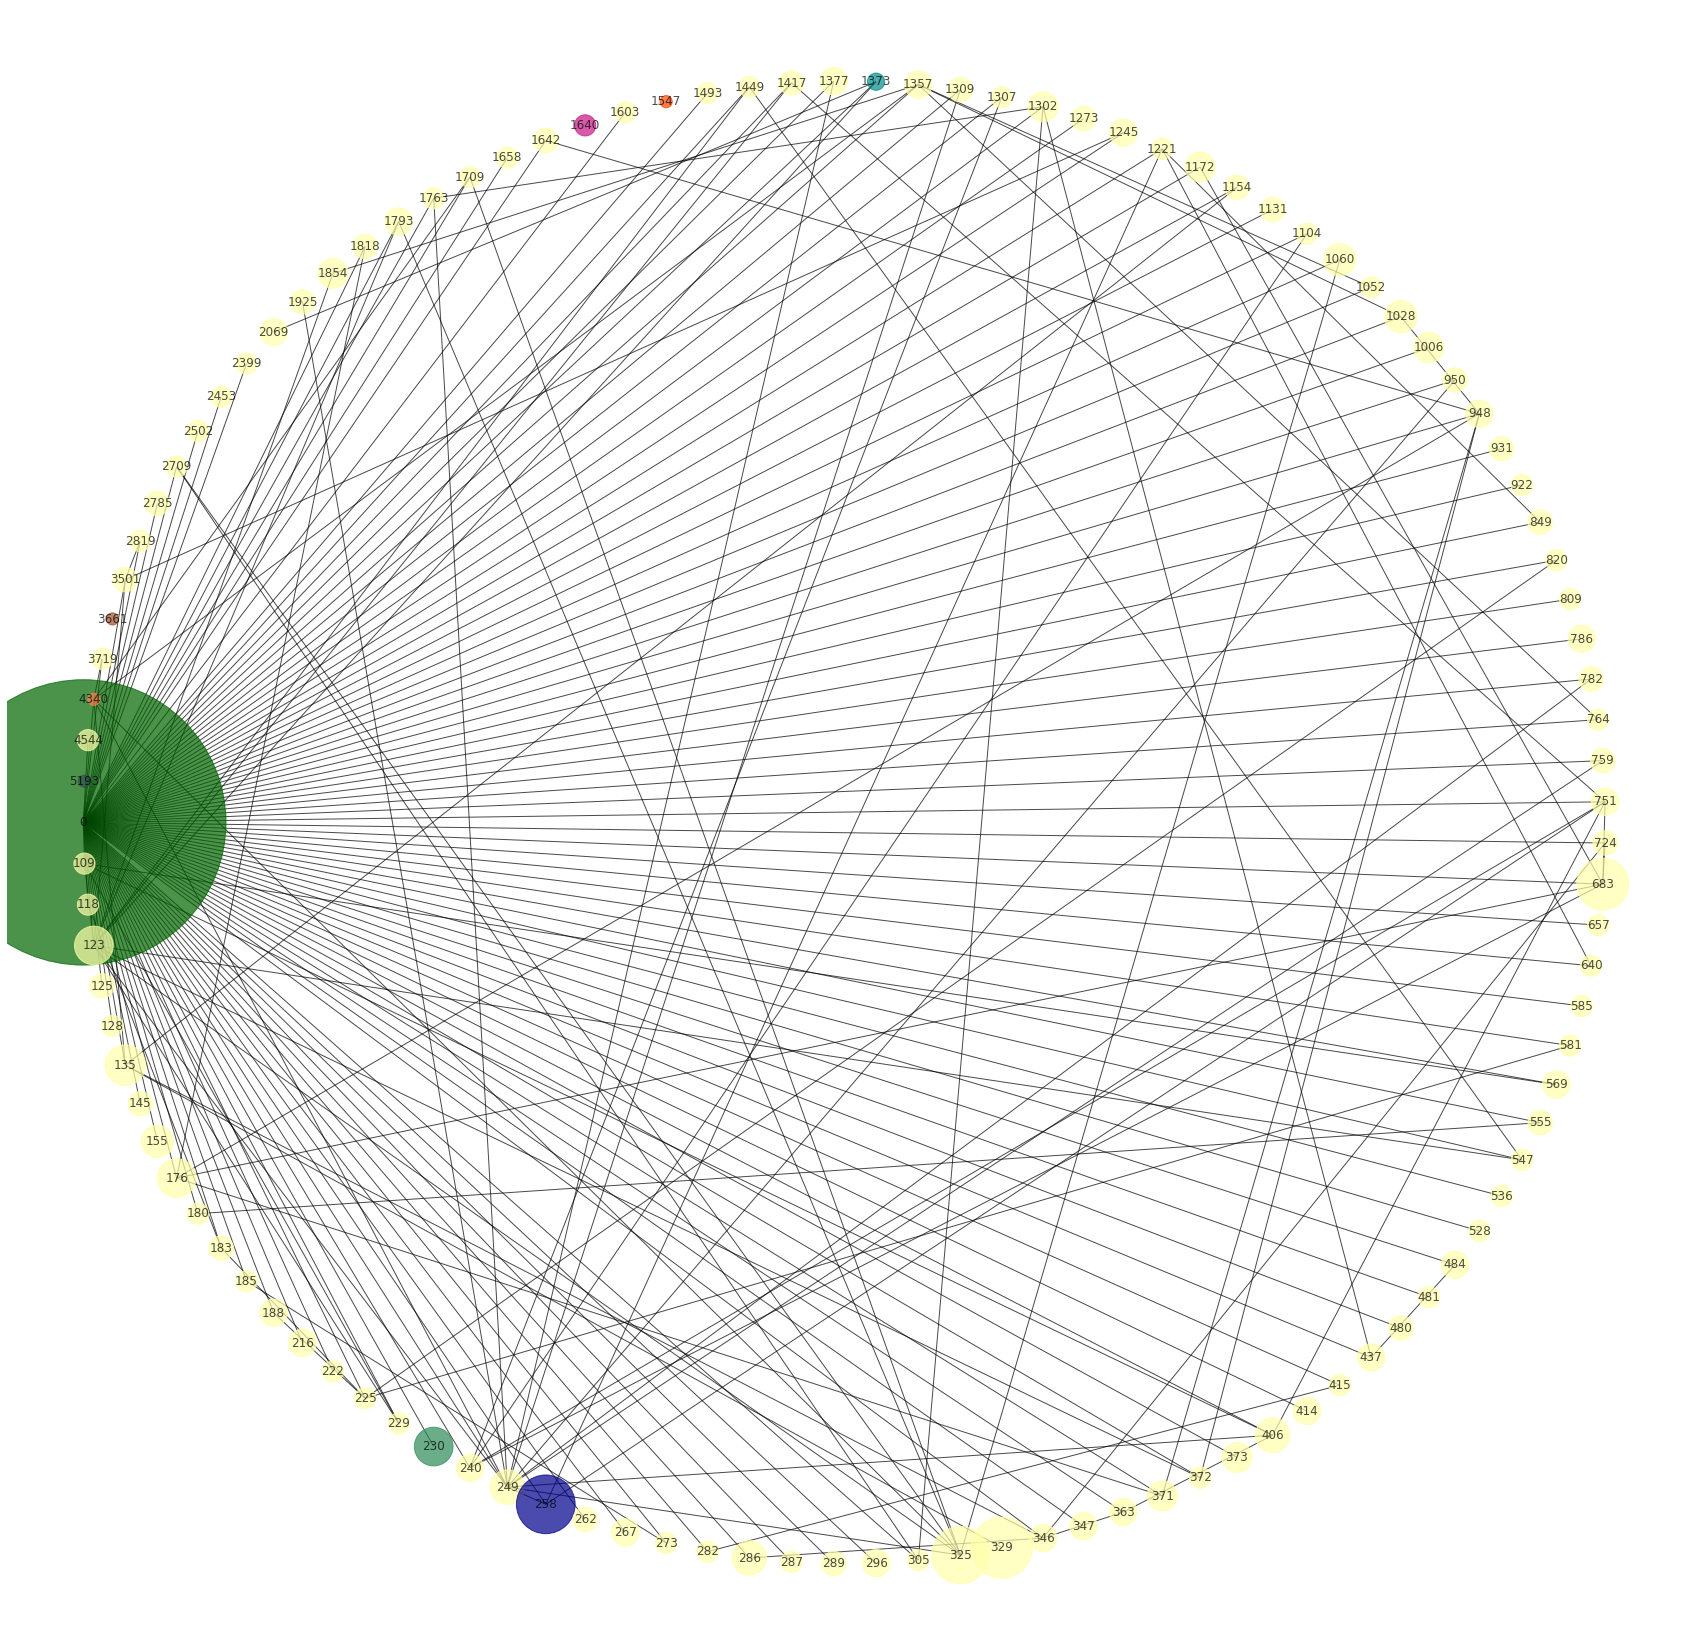

In [69]:
import json, bisect, networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
if 'list_dblp_edge2' not in globals(): 
    with open("ex4_data2_dblp_list_edge.json", "r", encoding="utf-8") as f:
        list_dblp_tmp = json.load(f)
    list_dblp_edge2 = []
    for edge1 in list_dblp_tmp:
        list_dblp_edge2.append((edge1[0], edge1[1]))
dblp_nodenum2 = 6252
with open("ex4_data2_dblp_list_FID.json", "r", encoding="utf-8") as f:
    list_dblp_FID2 = json.load(f)
with open("ex4_data2_dblp_list_nodeinfo.json", "r", encoding="utf-8") as f:
    list_dblp_nodeinfo = json.load(f)
for list_dblp_node in list_dblp_nodeinfo:
    if len(list_dblp_node) == 1:
        continue
    restmp = contractor(list_dblp_edge2, dblp_nodenum2, list_dblp_node)
    if type(restmp) is list:# 隣接リスト
        list_dblp_edge2 = []
        for node1, list_adj in enumerate(restmp):
            for node2 in list_adj:
                list_dblp_edge2.append(node1, node2)
    else: # 隣接行列 
        list_dblp_edge2 = list(restmp.keys())
nx_dblp_graph2 = nx.Graph();list_dblp_nodesize2 = [];list_dblp_nodecol2 = [];dic_dblp_drawnnode2 = {}
for list_dblp_node in list_dblp_nodeinfo:
    f1 = False
    for j in range(len(list_dblp_FID2)):
        index1 = bisect.bisect_left(list_dblp_node, list_dblp_FID2[j][0])
        if index1 < len(list_dblp_node) and list_dblp_node[index1] == list_dblp_FID2[j][0]:
            list_dblp_nodecol2.append(list_dblp_FID2[j][3])
            f1 = True
            break
    dic_dblp_drawnnode2[list_dblp_node[0]] = False
    if f1 is False and len(list_dblp_node) < 3:
        continue
    dic_dblp_drawnnode2[list_dblp_node[0]] = True    
    nx_dblp_graph2.add_node(list_dblp_node[0])
    list_dblp_nodesize2.append(300 * len(list_dblp_node) * 0.5)
    if f1 is False:
        list_dblp_nodecol2.append("#ffffaa")
for edge1 in list_dblp_edge2:
    if dic_dblp_drawnnode2[edge1[0]] is True and dic_dblp_drawnnode2[edge1[1]] is True:
        nx_dblp_graph2.add_edge(edge1[0], edge1[1])
plt.figure(figsize=(30, 30))
nx.draw_networkx(nx_dblp_graph2, pos=nx.shell_layout(nx_dblp_graph2), node_color=list_dblp_nodecol2, node_size=list_dblp_nodesize2, alpha=0.7)
plt.axis('off')
plt.show();

頂点の大きさは、頂点に統合されている点の数に比例しています。また、以下の著名人が上記のグラフには含まれます。

頂点の番号 | 著者名 | 概要 
 - | - | - 
<font color=#008b8b>1373</font> | <font color=#008b8b>Shapley, Lloyd S.</font> | 2012年のノーベル経済学賞の受賞者。東大の進振りにも彼の考案したアルゴリズムが使われているとかいないとか
<font color=#ff7f50>4340</font> | <font color=#ff7f50>Roth, Alvin E.</font> | 2012年のノーベル経済学賞の受賞者
<font color=#006400>0</font> | <font color=#006400>Allen, Paul G.</font> | マイクロソフトの創業者。沈没した軍艦を引き上げたりしている方の人
<font color=#ff4500>1547</font> | <font color=#ff4500>Gates, William H.</font> | マイクロソフトの創業者
<font color=#2f4f4f>5193</font> | <font color=#2f4f4f>Turing, Alan M.</font> | 計算機の原モデルを考案した数学者
<font color=#c71585>1640</font> | <font color=#c71585>Neumann, John von</font> | ノイマン型計算機の考案者
<font color=#2e8b57>230</font> | <font color=#2e8b57>Chomsky, Noam</font> | 色々なところに顔を出す言語学者
<font color=#00008b>258</font> | <font color=#00008b>Rossum, Guido van</font> | Ptyhonの考案者
<font color=#a0522d>3661</font> | <font color=#a0522d>Nash, John F., Jr.</font> | 1994年のノーベル経済学賞の受賞者

<b>問題の難易度評価：</b>
下のセルにこの問の難易度を5段階（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）で評価して下さい。（次回以降の課題の難易度の調整に使います）
また、解答するのにかかった時間や感想などがあれば適宜記載して下さい。

In [ ]:
#難易度（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）
# 4
#感想
